In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/data_phdosado.csv', index_col=1)
df = df.drop(columns=['ID'])
list(df.columns)

['Real_RD_PV_pHDosado',
 'Real_RD_MV_ValvulaCalpHDosado',
 'Real_RD_PV_VazaoDosado',
 'Real_RD_ST_LimpezaPHmetro',
 'Real_RD_PV_BaumeCal',
 'Real_RD_PV_PressaoLinhaCal',
 'Real_RD_MV_ValvulaCalpHDosado-2',
 'Real_RD_MV_PressaoLinhaCal',
 'Real_RD_PV_NivelTqCal',
 'Real_RD_PV_NivelTqDosado']

In [3]:
df.head()

,Real_RD_PV_pHDosado,Real_RD_MV_ValvulaCalpHDosado,Real_RD_PV_VazaoDosado,Real_RD_ST_LimpezaPHmetro,Real_RD_PV_BaumeCal,Real_RD_PV_PressaoLinhaCal,Real_RD_MV_ValvulaCalpHDosado-2,Real_RD_MV_PressaoLinhaCal,Real_RD_PV_NivelTqCal,Real_RD_PV_NivelTqDosado
timezone,,,,,,,,,,
2024-07-13 14:28:22,7.1260,37.128124,899.625,0.0,20.454374,0.798437,37.128124,74.546875,98.31250,73.84375
2024-07-13 14:28:25,7.1225,37.178123,899.625,0.0,20.454374,0.798437,37.178123,74.578125,98.34375,73.87500
2024-07-13 14:28:28,7.1225,37.187500,899.625,0.0,20.454374,0.796875,37.187500,74.559375,98.40625,73.87500
2024-07-13 14:28:31,7.1260,37.331249,899.625,0.0,20.454374,0.798437,37.331249,74.596875,98.50000,73.84375
2024-07-13 14:28:34,7.1225,37.218750,900.375,0.0,20.454374,0.798437,37.218750,74.562500,98.25000,73.87500


In [4]:
from matplotlib import pyplot as plt

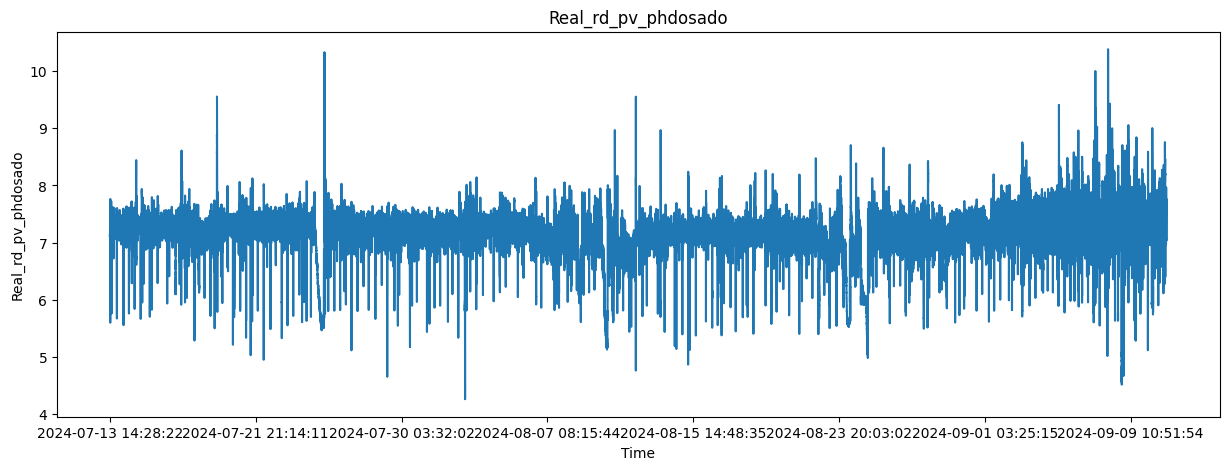

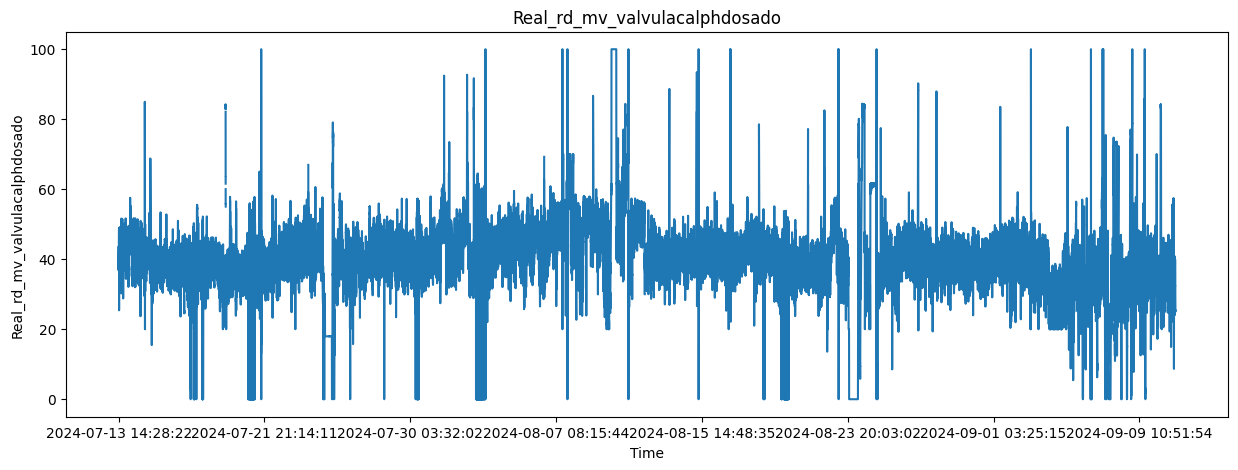

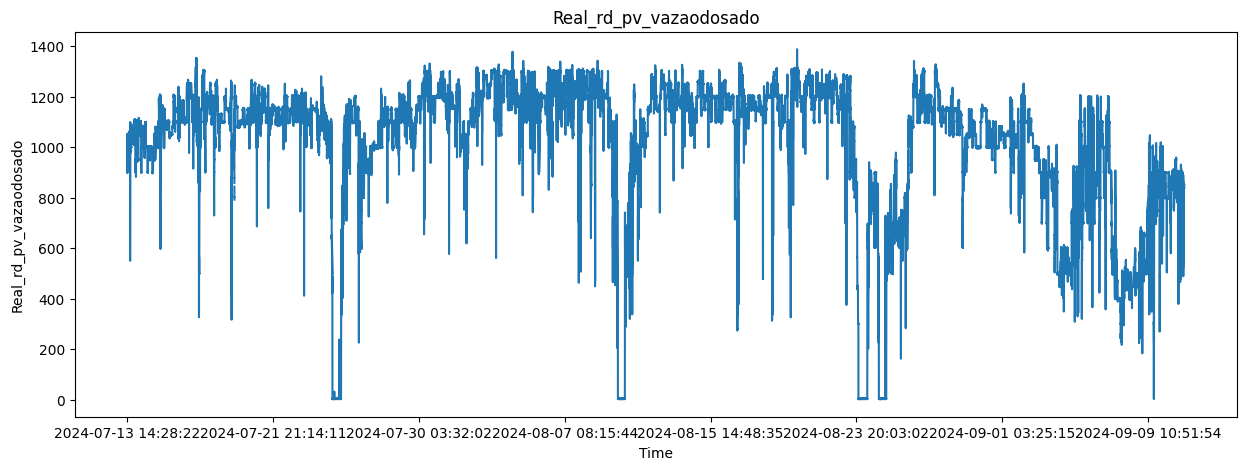

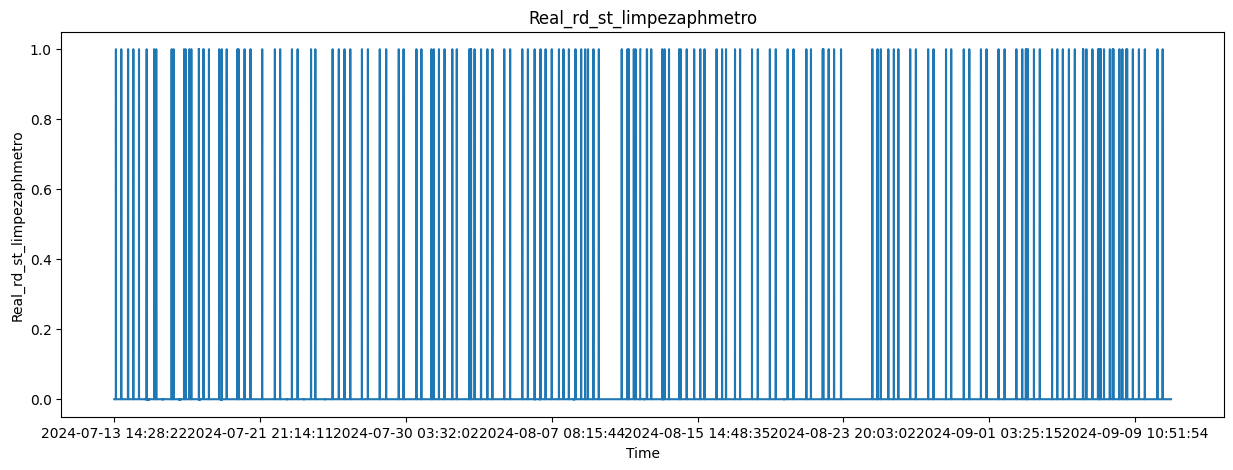

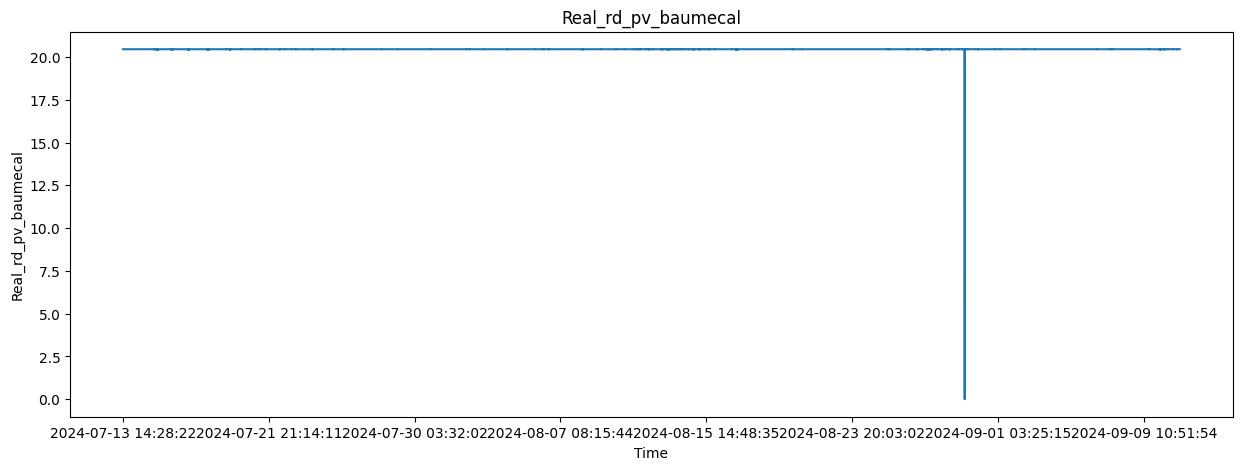

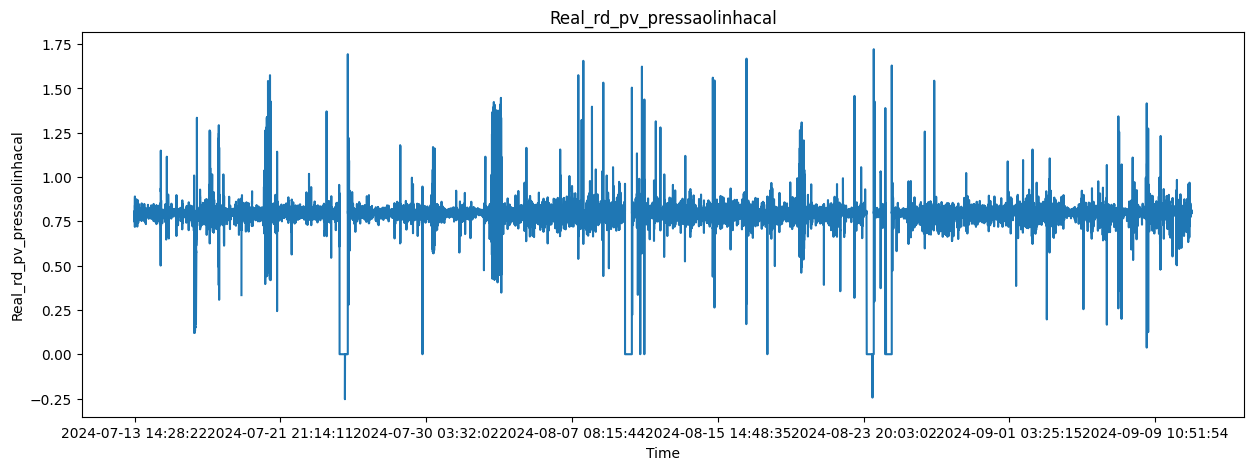

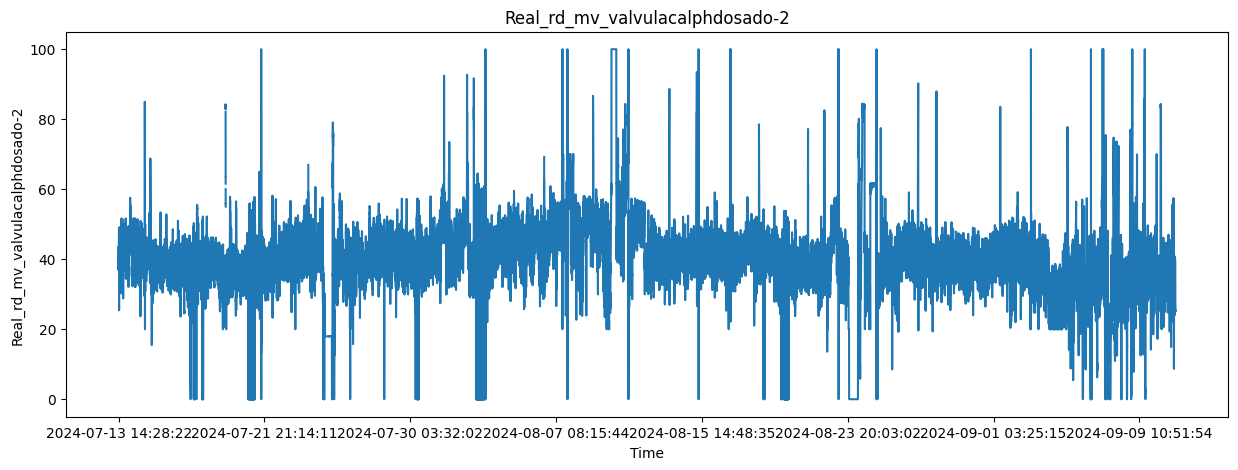

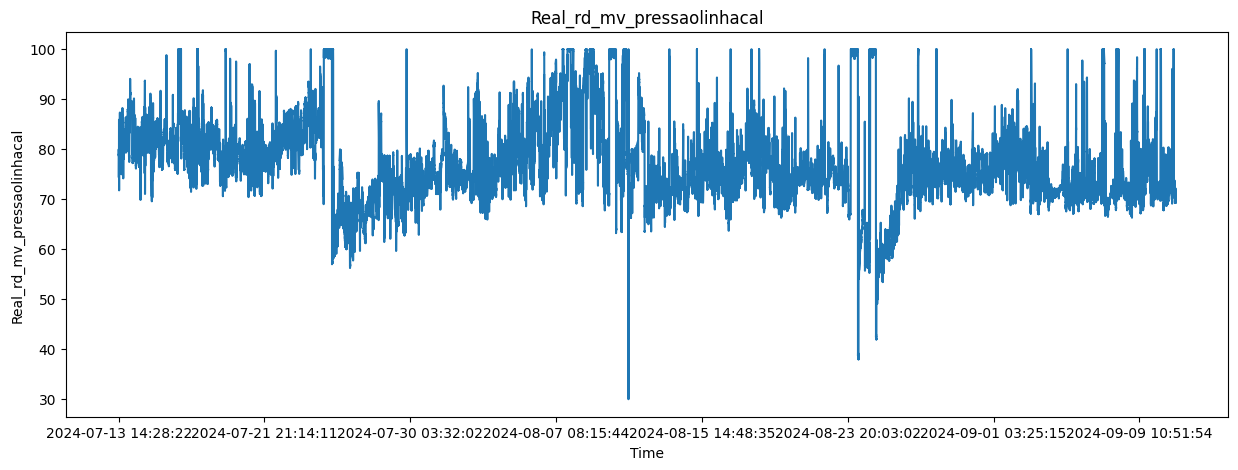

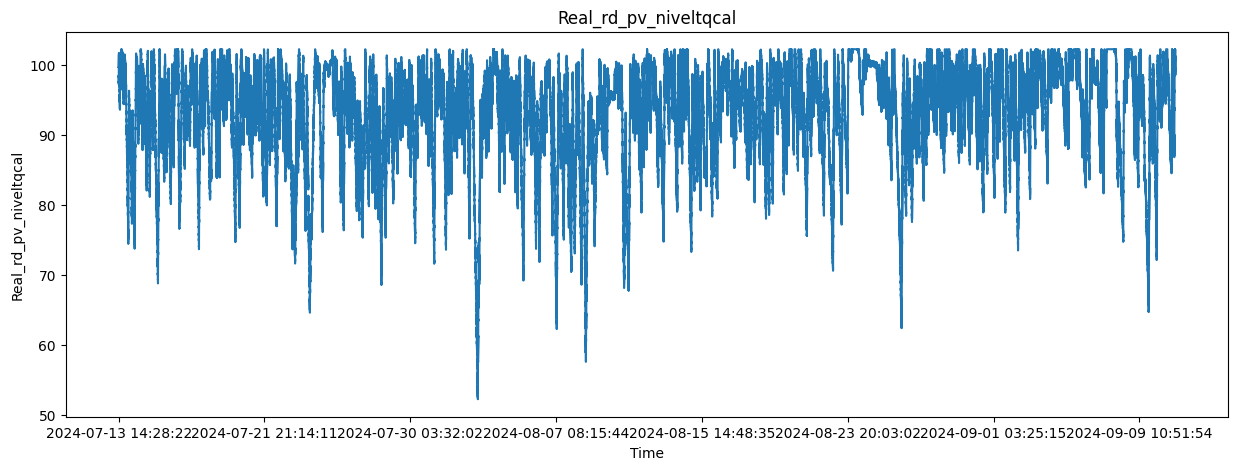

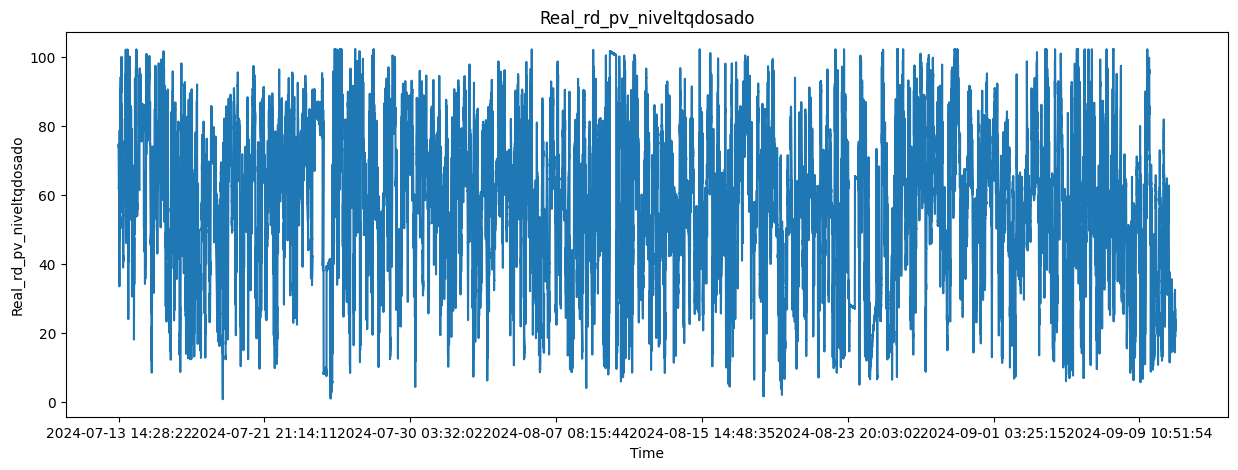

In [5]:
for column in df.columns:
    ax = df[column].plot(title=f'{column.capitalize()}', ylabel=column.capitalize(), xlabel='Time', figsize=(15, 5))
    plt.show()

In [6]:
import seaborn as sns

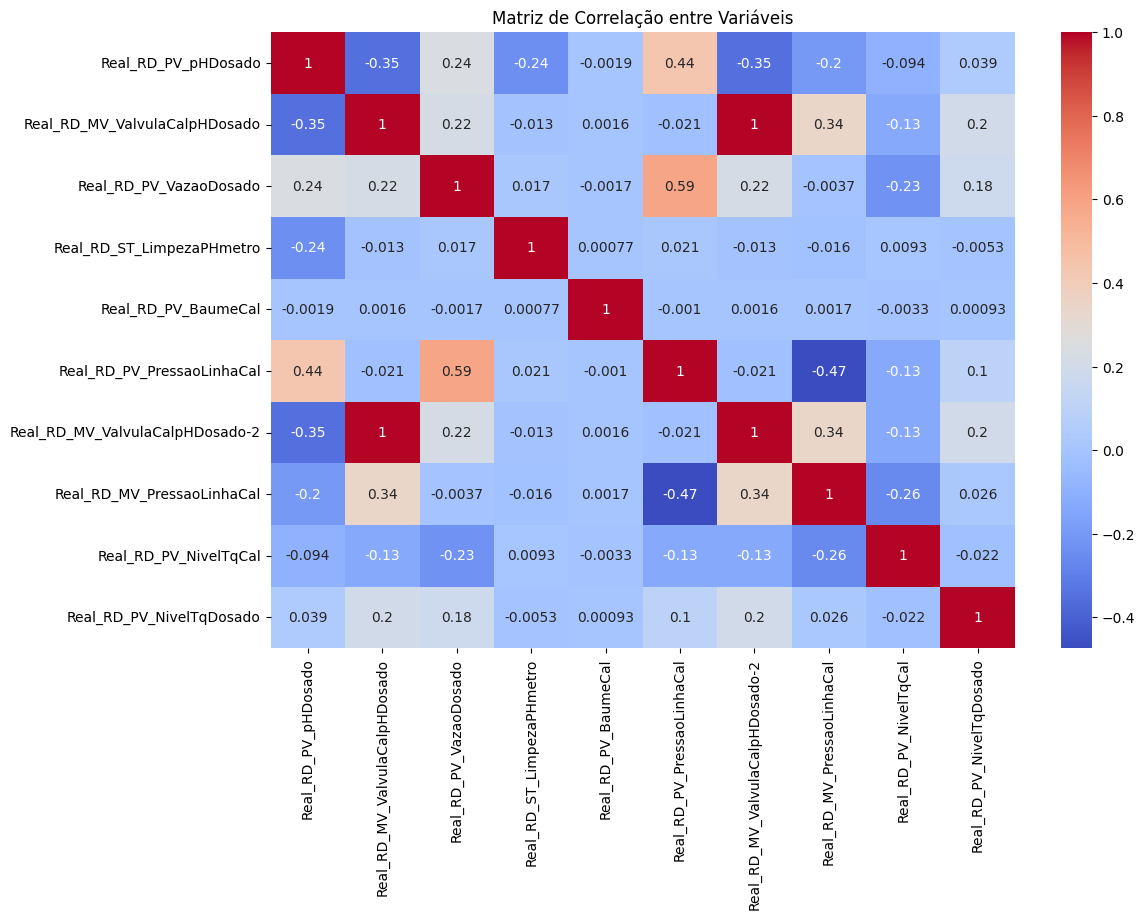

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

Pré-processamento dos Dados

In [11]:
# Verificar valores faltantes
print("Valores faltantes antes da imputação:")
print(df.isnull().sum())

# Preencher valores faltantes com interpolação linear baseada no tempo
df.interpolate(method='linear', inplace=True)

# Verificar novamente valores faltantes após a imputação
print("\nValores faltantes após a imputação:")
print(df.isnull().sum())

Valores faltantes antes da imputação:
Real_RD_PV_pHDosado                89
Real_RD_MV_ValvulaCalpHDosado      97
Real_RD_PV_VazaoDosado             64
Real_RD_ST_LimpezaPHmetro          99
Real_RD_PV_BaumeCal                89
Real_RD_PV_PressaoLinhaCal         88
Real_RD_MV_ValvulaCalpHDosado-2    97
Real_RD_MV_PressaoLinhaCal         51
Real_RD_PV_NivelTqCal              92
Real_RD_PV_NivelTqDosado           61
dtype: int64

Valores faltantes após a imputação:
Real_RD_PV_pHDosado                0
Real_RD_MV_ValvulaCalpHDosado      0
Real_RD_PV_VazaoDosado             0
Real_RD_ST_LimpezaPHmetro          0
Real_RD_PV_BaumeCal                0
Real_RD_PV_PressaoLinhaCal         0
Real_RD_MV_ValvulaCalpHDosado-2    0
Real_RD_MV_PressaoLinhaCal         0
Real_RD_PV_NivelTqCal              0
Real_RD_PV_NivelTqDosado           0
dtype: int64


In [14]:
# Remoção de outliers
from scipy import stats
import numpy as np

In [16]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df

,Real_RD_PV_pHDosado,Real_RD_MV_ValvulaCalpHDosado,Real_RD_PV_VazaoDosado,Real_RD_ST_LimpezaPHmetro,Real_RD_PV_BaumeCal,Real_RD_PV_PressaoLinhaCal,Real_RD_MV_ValvulaCalpHDosado-2,Real_RD_MV_PressaoLinhaCal,Real_RD_PV_NivelTqCal,Real_RD_PV_NivelTqDosado
timezone,,,,,,,,,,
2024-07-13 14:28:22,7.1260,37.128124,899.625,0.0,20.454374,0.798437,37.128124,74.546875,98.312500,73.843750
2024-07-13 14:28:25,7.1225,37.178123,899.625,0.0,20.454374,0.798437,37.178123,74.578125,98.343750,73.875000
2024-07-13 14:28:28,7.1225,37.187500,899.625,0.0,20.454374,0.796875,37.187500,74.559375,98.406250,73.875000
2024-07-13 14:28:31,7.1260,37.331249,899.625,0.0,20.454374,0.798437,37.331249,74.596875,98.500000,73.843750
2024-07-13 14:28:34,7.1225,37.218750,900.375,0.0,20.454374,0.798437,37.218750,74.562500,98.250000,73.875000
...,...,...,...,...,...,...,...,...,...,...
2024-09-11 11:59:46,7.6230,25.206249,837.750,0.0,20.454374,0.800000,25.206249,69.303125,100.696875,19.168751
2024-09-11 11:59:49,7.6230,25.228125,837.000,0.0,20.454374,0.800000,25.228125,69.331250,100.896875,19.262501
2024-09-11 11:59:52,7.6230,25.196875,837.375,0.0,20.454374,0.801562,25.196875,69.315625,101.046875,19.168751


In [17]:
# Normalizando os dados
mean = df[:200000].mean(axis=0)
df -= mean
std = df[:200000].std(axis=0)
df /= std

Preparação dos dados

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [39]:
import numpy as np

def create_data_generator(data, lookback, delay, min_index, max_index,
                          batch_size=128, step=6, shuffle=False):
    """Gerador de dados para previsão de séries temporais."""
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples, targets = [], []
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples.append(data.iloc[indices].values.flatten())  # Flatten para formato 2D
            targets.append(data.iloc[rows[j] + delay, 1])  # Previsão de uma única coluna
        yield np.array(samples), np.array(targets)

In [40]:
def build_dense_model(input_shape):
    """Modelo denso simples para previsão de séries temporais."""
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def build_model_with_dropout(input_shape):
    """Modelo denso com dropout para regularização."""
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
    return model

def build_model_with_regularization(input_shape):
    """Modelo denso com regularização L2 para evitar overfitting."""
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01)),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
    return model

def build_model_with_rnn(input_shape):
    """Modelo com RNN (LSTM) para previsão de séries temporais."""
    model = Sequential([
        LSTM(64, activation='relu', input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
    return model

In [41]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [42]:
def train_and_evaluate_model(model, train_gen, val_gen, train_steps, val_steps, epochs=20):
    """Função para treinar e avaliar o modelo, incluindo EarlyStopping."""
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = model.fit(
        train_gen,
        steps_per_epoch=train_steps,
        epochs=epochs,
        validation_data=val_gen,
        validation_steps=val_steps,
        callbacks=[early_stopping]
    )
    
    return history

def plot_history(history, title):
    """Função para plotar o histórico de perda e MAE."""
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title(f'{title} - MAE')
    plt.legend()
    plt.show()

In [43]:
# Geradores de dados
train_gen = create_data_generator(df, lookback=1440, delay=144, min_index=0, max_index=200000, batch_size=128, step=6, shuffle=True)
val_gen = create_data_generator(df, lookback=1440, delay=144, min_index=200001, max_index=300000, batch_size=128, step=6, shuffle=True)
test_gen = create_data_generator(df, lookback=1440, delay=144, min_index=300001, max_index=None, batch_size=128, step=6, shuffle=False)

train_steps = (200000 - 0 - 1440) // 128
val_steps = (300000 - 200001 - 1440) // 128
test_steps = (len(df) - 300001 - 1440) // 128

Camada Dense

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [44]:
# Criando e treinando o modelo denso
dense_model = build_dense_model(input_shape=(1440 // 6 * df.shape[-1],))
history_dense = train_and_evaluate_model(dense_model, train_gen, val_gen, train_steps, val_steps)

Epoch 1/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - loss: 1.0087 - mae: 0.7675 - val_loss: 1.2892 - val_mae: 0.8633
Epoch 2/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - loss: 1.0048 - mae: 0.7668 - val_loss: 1.2837 - val_mae: 0.8610
Epoch 3/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - loss: 1.0057 - mae: 0.7659 - val_loss: 1.2882 - val_mae: 0.8626
Epoch 4/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - loss: 1.0040 - mae: 0.7676 - val_loss: 1.2748 - val_mae: 0.8584
Epoch 5/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - loss: 1.0009 - mae: 0.7652 - val_loss: 1.2663 - val_mae: 0.8544
Epoch 6/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - loss: 1.0074 - mae: 0.7672 - val_loss: 1.2842 - val_mae: 0.8614
Epoch 7/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - loss: 1.0107 - mae: 0.7686 - val_loss: 1.2652 - val_mae: 0.8531
Epoch 8/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - loss: 1.0067 - mae: 0.7689 - val_loss: 1.2673 - val_mae: 0.8570
Epoch 9/20
1551/1551 ━━━

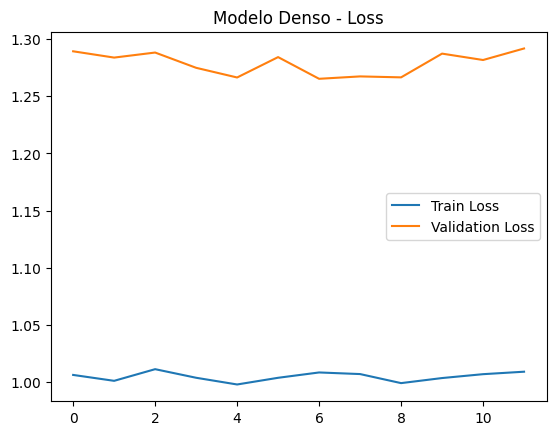

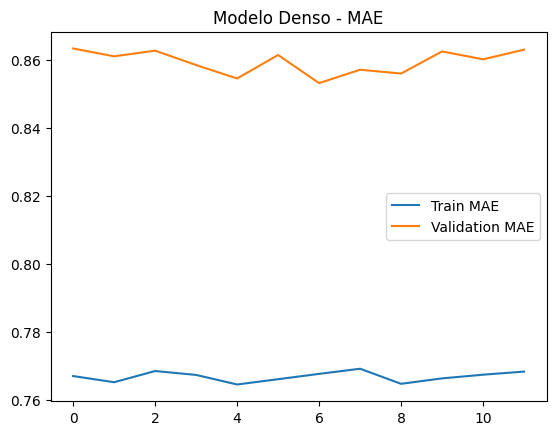

In [45]:
# Plotando o histórico do modelo denso
plot_history(history_dense, 'Modelo Denso')

In [46]:
# Avaliação no conjunto de teste
mae_dense = dense_model.evaluate(test_gen, steps=test_steps)
print(f'MAE no conjunto de teste para o modelo denso: {mae_dense}')

9532/9532 ━━━━━━━━━━━━━━━━━━━━ 277s 29ms/step - loss: 2.1598 - mae: 1.1172
MAE no conjunto de teste para o modelo denso: [2.145714044570923, 1.1030539274215698]


In [47]:
print("MAE Final (Validação) - Modelo com Dense:", history_dense.history['val_mae'][-1])

MAE Final (Validação) - Modelo com Dense: 0.8629227876663208


Modelo com Dropout

In [48]:
dropout_model = build_model_with_dropout(input_shape=(1440 // 6 * df.shape[-1],))
history_dropout = train_and_evaluate_model(dropout_model, train_gen, val_gen, train_steps, val_steps)

Epoch 1/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 95s 60ms/step - loss: 0.9900 - mae: 0.7617 - val_loss: 1.2772 - val_mae: 0.8572
Epoch 2/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - loss: 0.9977 - mae: 0.7642 - val_loss: 1.2855 - val_mae: 0.8635
Epoch 3/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - loss: 1.0044 - mae: 0.7660 - val_loss: 1.2745 - val_mae: 0.8591
Epoch 4/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - loss: 1.0068 - mae: 0.7678 - val_loss: 1.2724 - val_mae: 0.8565
Epoch 5/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - loss: 1.0122 - mae: 0.7683 - val_loss: 1.2769 - val_mae: 0.8593
Epoch 6/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - loss: 1.0020 - mae: 0.7652 - val_loss: 1.2714 - val_mae: 0.8578
Epoch 7/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - loss: 1.0008 - mae: 0.7646 - val_loss: 1.3013 - val_mae: 0.8665
Epoch 8/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 93s 60ms/step - loss: 1.0049 - mae: 0.7661 - val_loss: 1.2627 - val_mae: 0.8545
Epoch 9/20
1551/1551 ━━━

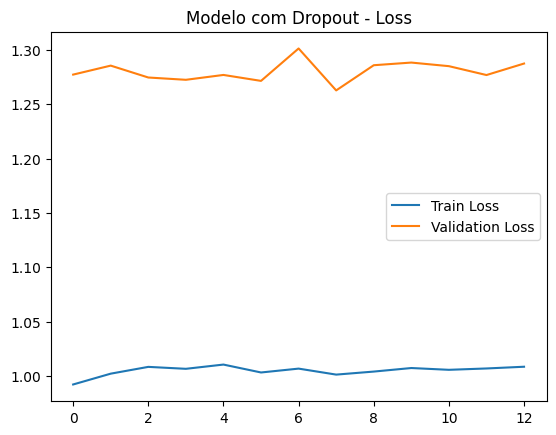

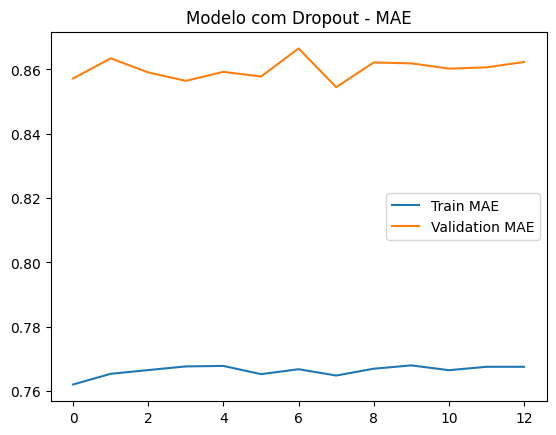

In [49]:
plot_history(history_dropout, 'Modelo com Dropout')

In [ ]:
# Avaliação no conjunto de teste
mae_dropout = dropout_model.evaluate(test_gen, steps=test_steps)
print(f'MAE no conjunto de teste: {mae_dropout}')

9532/9532 ━━━━━━━━━━━━━━━━━━━━ 199s 21ms/step - loss: 2.1636 - mae: 1.1182
MAE no conjunto de teste para o modelo denso: [2.1474974155426025, 1.1036022901535034]


In [52]:
print("MAE Final (Validação) - Modelo com Dropout:", history_dropout.history['val_mae'][-1])

MAE Final (Validação) - Modelo com Dropout: 0.8623224496841431


Modelo com Regularização L2

In [53]:
regularization_model = build_model_with_regularization(input_shape=(1440 // 6 * df.shape[-1],))
history_regularization = train_and_evaluate_model(regularization_model, train_gen, val_gen, train_steps, val_steps)

Epoch 1/20


c:\Users\laura\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1551/1551 ━━━━━━━━━━━━━━━━━━━━ 105s 66ms/step - loss: nan - mae: 0.7662 - val_loss: nan - val_mae: 0.8569
Epoch 2/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 88s 57ms/step - loss: nan - mae: 0.7661 - val_loss: nan - val_mae: 0.8653
Epoch 3/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - loss: nan - mae: 0.7651 - val_loss: nan - val_mae: 0.8591
Epoch 4/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 69s 45ms/step - loss: nan - mae: 0.7674 - val_loss: nan - val_mae: 0.8610
Epoch 5/20
1551/1551 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - loss: nan - mae: 0.7672 - val_loss: nan - val_mae: 0.8581


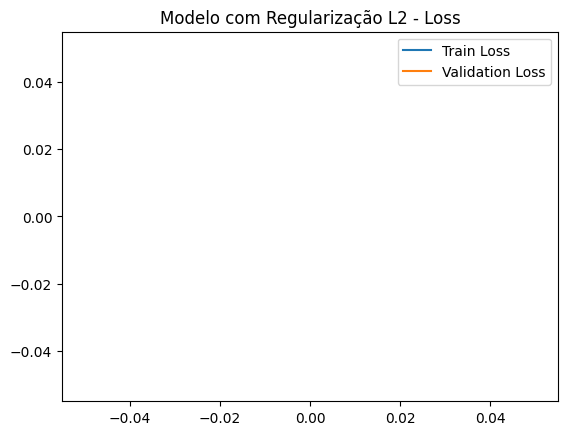

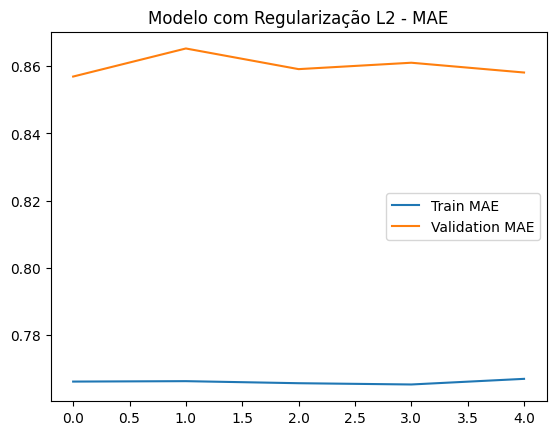

In [54]:
plot_history(history_regularization, 'Modelo com Regularização L2')

In [55]:
# Avaliação no conjunto de teste
mae_regularization = regularization_model.evaluate(test_gen, steps=test_steps)
print(f'MAE no conjunto de teste: {mae_regularization}')

9532/9532 ━━━━━━━━━━━━━━━━━━━━ 211s 22ms/step - loss: nan - mae: 1.1210
MAE no conjunto de teste para o modelo denso: [nan, 1.104873776435852]


In [56]:
print("MAE Final (Validação) - Modelo com Regularização:", history_regularization.history['val_mae'][-1])

MAE Final (Validação) - Modelo com Regularização: 0.8581157922744751


Modelo com RNN

In [57]:
rnn_model = build_model_with_rnn(input_shape=(1440 // 6, df.shape[-1]))
history_rnn = train_and_evaluate_model(rnn_model, train_gen, val_gen, train_steps, val_steps)

Epoch 1/20


c:\Users\laura\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("Cast:0", shape=(None, 2400), dtype=float32). Expected shape (None, 240, 10), but input has incompatible shape (None, 2400)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 2400), dtype=float32)
  • training=True
  • mask=None

In [ ]:
plot_history(history_rnn, 'Modelo com RNN')

In [ ]:
# Avaliação no conjunto de teste
mae_rnn = rnn_model.evaluate(test_gen, steps=test_steps)
print(f'MAE no conjunto de teste para o modelo rnn: {mae_rnn}')

In [ ]:
print("MAE Final (Validação) - Modelo com RNN:", history_rnn.history['val_mae'][-1])